<a href="https://colab.research.google.com/github/ClarisseAlvarenga/codenation_aceleradev_ds/blob/master/Desafio_Semana_8_Codenation_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDIZENDO NOTAS DE MATEMÁTICA DO ENEM 2016


In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Conhecendo o Dataset

In [2]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
#lendo o arquivo
enem = pd.read_csv('train.csv')

In [3]:
#visualizando os dados
enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.00,1,1,"4,314,902.00",Porto Alegre,43.00,RS,1,4,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.00,5.00,1.00,0.00,0.00,5,5,0,5,5,5,5,5.00,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.00,3,1,"2,304,707.00",Granja,23.00,CE,2,0,2,1.00,0,"23,005,157.00","2,304,707.00",Granja,23.00,CE,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,nan,nan,nan,nan,nan,5,5,1,1,1,1,1,nan,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.00,3,1,"2,304,400.00",Fortaleza,23.00,CE,3,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,nan,nan,nan,nan,nan,5,5,5,5,5,5,5,nan,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.00,0,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,1,9,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.00,0.00,5.00,5.00,5.00,5,5,5,5,2,5,5,5.00,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.00,2,1,"1,505,304.00",Oriximiná,15.00,PA,1,4,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.00,4.00,3.00,5.00,4.00,5,5,4,3,1,4,5,nan,A,A,A,A,A,A,A,A,A


In [4]:
#informações gerais
enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [5]:
#quantidade de dados
enem.shape

(13730, 167)

In [6]:
#visualizando o arquivo de teste
teste = pd.read_csv('test.csv')

In [7]:
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,nan,0,nan,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.80,443.50,431.80,0,1.00,120.00,80.00,80.00,100.00,40.00,420.00,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,nan,0,nan,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.10,491.10,548.00,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.00,0,2.00,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.90,622.70,613.60,0,1.00,80.00,40.00,40.00,80.00,80.00,320.00,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.00,0,2.00,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.90,492.60,571.40,1,1.00,100.00,80.00,60.00,80.00,0.00,320.00,D,H,H,C,B,A,NaN,A


In [8]:
teste.shape

(4576, 47)

In [9]:
#buscando as colunas disponíveis no teste incluindo a nota de matemática e colocando numa lista para aplicar no treino
colunas = list(teste.columns)
colunas.append('NU_NOTA_MT')
colunas

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'NU_NOTA_MT']

### Ajustando o treino para conter apenas as colunas do teste

In [10]:
#criando um DF a partir do df de treino, com as colunas do teste e a coluna de nota de matemática
treino = enem[colunas]
treino.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,nan,0,nan,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.30,495.40,581.20,1,1.00,120.00,120.00,120.00,80.00,80.00,520.00,D,D,C,A,A,C,H,A,399.40
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.00,0,2.00,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.50,544.10,599.00,1,1.00,140.00,120.00,120.00,120.00,80.00,580.00,A,A,B,A,A,A,NaN,A,459.80
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,D,D,C,A,A,A,NaN,A,nan
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,H,E,E,C,B,C,F,D,nan
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,E,D,C,A,A,B,F,A,nan


In [11]:
treino.shape

(13730, 48)

In [12]:
#revendo as informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            13730 non-null  object 
 1   CO_UF_RESIDENCIA        13730 non-null  int64  
 2   SG_UF_RESIDENCIA        13730 non-null  object 
 3   NU_IDADE                13730 non-null  int64  
 4   TP_SEXO                 13730 non-null  object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   TP_NACIONALIDADE        13730 non-null  int64  
 7   TP_ST_CONCLUSAO         13730 non-null  int64  
 8   TP_ANO_CONCLUIU         13730 non-null  int64  
 9   TP_ESCOLA               13730 non-null  int64  
 10  TP_ENSINO               4282 non-null   float64
 11  IN_TREINEIRO            13730 non-null  int64  
 12  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 13  IN_BAIXA_VISAO          13730 non-null  int64  
 14  IN_CEGUEIRA             13730 non-null

In [13]:
#separando as colunas não numéricas
treino_cat = treino.select_dtypes(exclude='number')
treino_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NU_INSCRICAO      13730 non-null  object
 1   SG_UF_RESIDENCIA  13730 non-null  object
 2   TP_SEXO           13730 non-null  object
 3   CO_PROVA_CN       13730 non-null  object
 4   CO_PROVA_CH       13730 non-null  object
 5   CO_PROVA_LC       13730 non-null  object
 6   CO_PROVA_MT       13730 non-null  object
 7   Q001              13730 non-null  object
 8   Q002              13730 non-null  object
 9   Q006              13730 non-null  object
 10  Q024              13730 non-null  object
 11  Q025              13730 non-null  object
 12  Q026              13730 non-null  object
 13  Q027              6357 non-null   object
 14  Q047              13730 non-null  object
dtypes: object(15)
memory usage: 1.6+ MB


In [14]:
treino_cat.isna().sum()

NU_INSCRICAO           0
SG_UF_RESIDENCIA       0
TP_SEXO                0
CO_PROVA_CN            0
CO_PROVA_CH            0
CO_PROVA_LC            0
CO_PROVA_MT            0
Q001                   0
Q002                   0
Q006                   0
Q024                   0
Q025                   0
Q026                   0
Q027                7373
Q047                   0
dtype: int64

In [15]:
#visualizando as colunas numéricas
treino_num = treino.select_dtypes(include='number')

In [16]:
treino_num.isna().sum()

CO_UF_RESIDENCIA             0
NU_IDADE                     0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
NU_NOTA_REDACAO           3597
NU_NOTA_

In [17]:
#visualizando o dataframe no qual todas as notas de matemática são nulas
notas_nulas = treino.loc[treino.NU_NOTA_MT.isna()]
notas_nulas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 2 to 13722
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            3597 non-null   object 
 1   CO_UF_RESIDENCIA        3597 non-null   int64  
 2   SG_UF_RESIDENCIA        3597 non-null   object 
 3   NU_IDADE                3597 non-null   int64  
 4   TP_SEXO                 3597 non-null   object 
 5   TP_COR_RACA             3597 non-null   int64  
 6   TP_NACIONALIDADE        3597 non-null   int64  
 7   TP_ST_CONCLUSAO         3597 non-null   int64  
 8   TP_ANO_CONCLUIU         3597 non-null   int64  
 9   TP_ESCOLA               3597 non-null   int64  
 10  TP_ENSINO               643 non-null    float64
 11  IN_TREINEIRO            3597 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  643 non-null    float64
 13  IN_BAIXA_VISAO          3597 non-null   int64  
 14  IN_CEGUEIRA             3597 non-null  

In [18]:
notas_nulas.TP_PRESENCA_LC.unique()

array([0, 2])

In [19]:
#visualizando as notas de matemática nulas e tipo de presença LC = 0
notas_nulas.loc[notas_nulas.TP_PRESENCA_CH == 0]

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,D,D,C,A,A,A,NaN,A,nan
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,H,E,E,C,B,C,F,D,nan
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,E,D,C,A,A,B,F,A,nan
9,94f7e277f87cd58e10a45da4ad5dd168651cf3ef,31,MG,24,M,4,2,4,0,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,H,E,G,B,B,B,H,A,nan
13,8570b9be0b2b629d00743d0de77cd95a84a46fbc,23,CE,19,F,3,1,1,2,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,D,D,C,B,B,C,F,A,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,bc6ea97fcc031786198e58ca5485d2648a2145fb,27,AL,17,F,5,1,3,0,1,nan,1,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,C,B,B,B,B,A,NaN,A,nan
13713,e60cbd0026dae31e4f0580a909465c83355ea282,11,RO,25,M,3,1,1,8,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,C,C,D,B,B,B,I,A,nan
13715,99cfec493fefde4fcec60fd8c1e3eb1fe891fb31,41,PR,24,F,1,1,1,7,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,B,E,D,B,B,C,B,A,nan
13716,00bb288d1b225bf07136b1d6e5a20a0fa7f7e2a9,42,SC,18,M,3,1,1,1,1,nan,0,nan,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,C,C,G,B,B,C,NaN,A,nan


In [20]:
#visualizando as notas de matemática nulas e tipo de presença LC = 2
notas_nulas.loc[notas_nulas.TP_PRESENCA_CH == 2]

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
914,1137a6617af8f0068eaee69d1060e1c47e22ad2f,26,PE,16,M,3,1,3,0,1,nan,1,nan,0,0,0,0,0,0,0,0,2,2,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,A,C,E,B,B,A,NaN,A,nan
1280,a06a4bd8d0463a3e24190fd5ce646efe7f50103a,52,GO,17,M,1,1,2,0,2,1.00,0,2.00,0,0,0,0,0,0,0,0,2,2,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,D,D,C,B,B,A,NaN,A,nan
1775,8c498ad6e5e18416a465a0c92142b3311c9ceb47,13,AM,19,F,1,1,1,2,1,nan,0,nan,0,0,0,0,0,0,0,0,2,2,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,E,E,A,B,A,C,F,A,nan
6253,6bb192606f9dec4db121c348131c29b57235b77b,35,SP,20,M,1,1,1,3,1,nan,0,nan,0,0,0,0,0,0,0,0,2,2,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,E,E,C,B,A,B,A,A,nan
12475,94e22d092f0ed45953c8e6e5261cb503270883cb,23,CE,17,M,2,1,2,0,2,1.00,0,2.00,0,0,0,0,0,0,0,0,2,2,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,H,H,B,A,A,A,NaN,A,nan


## Estratégia para substituir os nulos: - completar com zeros

In [21]:
#alterando o treino_cat e o treino_num para uma lista de colunas
treino_cat = list(treino.select_dtypes(exclude='number').columns)
treino_num = list(treino.select_dtypes(include='number').columns)

In [22]:
treino[treino_cat] = treino[treino_cat].fillna('0')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
treino[treino_num] = treino[treino_num].fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
treino = treino.set_index('NU_INSCRICAO')

In [25]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   SG_UF_RESIDENCIA        13730 non-null  object 
 2   NU_IDADE                13730 non-null  int64  
 3   TP_SEXO                 13730 non-null  object 
 4   TP_COR_RACA             13730 non-null  int64  
 5   TP_NACIONALIDADE        13730 non-null  int64  
 6   TP_ST_CONCLUSAO         13730 non-null  int64  
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_ESCOLA               13730 non-null  int64  
 9   TP_ENSINO               13730 non-null  float64
 10  IN_TREINEIRO            13730 non-null  int64  
 11  TP_DEPENDENCIA_ADM_ESC  13730 non-null  float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA           

## CRIANDO O X E Y PARA TREINAR O MODELO

In [26]:
#Separando as variáveis explicativas da variável dependente
X = treino.drop('NU_NOTA_MT', axis=1)
Y = treino['NU_NOTA_MT']

## Aplicando o pré processamento dos dados


In [28]:
#IMPORTANDO AS BIBLIOTECAS DE PRE-PROCESSAMENTO
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [29]:
#criando os pré-processadores
encoder_cat = OneHotEncoder(sparse=False)
scaler = StandardScaler()

In [30]:
#testando uma variável
encoder_cat.fit_transform(treino[['SG_UF_RESIDENCIA']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
#substituindo as colunas pelo pre-processamento
for coluna in X.columns[1:]:
  try:
    X[coluna] = encoder_cat.fit_transform(X[[coluna]])
    X[coluna] = scaler.fit_transform(X[[coluna]])
  except:
    print(f"Nao foi possivel realizar a operacao para a coluna {coluna}")

In [32]:
X.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,-0.07,-0.01,-1.27,-0.13,-0.03,1.05,-1.05,0.67,0.67,0.39,0.67,0.04,0.00,0.02,0.01,0.01,0.10,0.03,0.01,-0.57,-0.57,-0.60,-0.07,-0.07,-0.47,-0.07,-0.57,-0.57,-0.60,-0.83,-0.60,-0.62,-0.62,-0.62,-0.62,-0.67,-0.62,-0.27,-0.22,-0.19,1.12,1.15,-1.05,-1.08,0.41
2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,-0.07,-0.01,0.79,-0.13,-0.03,-0.95,0.95,-1.49,-1.49,0.39,-1.49,0.04,0.00,0.02,0.01,0.01,0.10,0.03,0.01,-0.57,-0.57,-0.60,-0.07,-0.07,-0.47,-0.07,-0.57,-0.57,-0.60,-0.83,-0.60,-0.62,-0.62,-0.62,-0.62,-0.67,-0.62,3.70,4.51,-0.19,1.12,1.15,0.95,0.93,0.41
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,-0.07,-0.01,0.79,-0.13,-0.03,-0.95,0.95,0.67,0.67,0.39,0.67,0.04,0.00,0.02,0.01,0.01,0.10,0.03,0.01,1.75,1.75,1.68,-0.07,-0.07,-0.47,-0.07,1.74,1.75,1.68,-0.83,1.68,1.61,1.61,1.60,1.60,1.48,1.61,-0.27,-0.22,-0.19,1.12,1.15,0.95,0.93,0.41
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,-0.07,-0.01,0.79,7.48,-0.03,1.05,-1.05,0.67,0.67,0.39,0.67,0.04,0.00,0.02,0.01,0.01,0.10,0.03,0.01,1.75,1.75,1.68,-0.07,-0.07,-0.47,-0.07,1.74,1.75,1.68,1.21,1.68,1.61,1.61,1.60,1.60,1.48,1.61,-0.27,-0.22,-0.19,-0.90,-0.87,-1.05,-1.08,-2.42
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,-0.07,-0.01,-1.27,-0.13,-0.03,1.05,-1.05,0.67,0.67,0.39,0.67,0.04,0.00,0.02,0.01,0.01,0.10,0.03,0.01,1.75,1.75,1.68,-0.07,-0.07,-0.47,-0.07,1.74,1.75,1.68,-0.83,1.68,1.61,1.61,1.60,1.60,1.48,1.61,-0.27,-0.22,-0.19,1.12,1.15,-1.05,-1.08,0.41


## DEFININDO AS FEATURES USANDO O RFE

In [33]:
#CONFERINDO O PCA
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X)
pca.n_components_

20

In [34]:
#importando modelo de regressão linear
from sklearn.linear_model import LinearRegression
#importando a biblioteca e buscando a ajuda do RFE
from sklearn.feature_selection import RFE

In [35]:
#criando um estimador para aplicar o RFE
estimador = LinearRegression()
rfe= RFE(estimador, 20, step=1) #definindo 20 features de acordo com a resposta do PCA

In [36]:
#fazendo a seleção de features usando o RFE
rfe.fit(X, Y)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [37]:
#criando um Dataframe para as colunas a manter
colunas_a_manter = pd.DataFrame({'coluna':X.columns,
              'bool': rfe.support_})

In [38]:
#definindo as features
colunas_teste = colunas_a_manter.loc[colunas_a_manter['bool'] == True]
colunas_teste

,coluna,bool
3,TP_SEXO,True
6,TP_ST_CONCLUSAO,True
7,TP_ANO_CONCLUIU,True
8,TP_ESCOLA,True
9,TP_ENSINO,True
11,TP_DEPENDENCIA_ADM_ESC,True
20,TP_PRESENCA_CN,True
21,TP_PRESENCA_CH,True
25,CO_PROVA_LC,True
28,NU_NOTA_CH,True


In [39]:
#definindo as colunas a usar nos testes
colunas_teste = list(colunas_teste.coluna.values)

## APLICANDO O MODELO

### Dividindo a base de treino entre treino e teste para testar a aderência das soluções

### Com todas as features

In [40]:
from sklearn.model_selection import train_test_split
#random_state define uma matriz fixa. Neste caso foi usado um número aleatório, exemplo da aula
#x_treino, x_teste, y_treino, y_teste = train_test_split(x,y_adivinhar, random_state = 326784)

#faz a função do random_state, mas aplica a todas as funções usadas
#np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, random_state = 1606 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(10297, 46)
(3433, 46)
(10297,)
(3433,)


In [41]:
#testando uma linear regression simples com todas as features
modelo = estimador

In [42]:
#ajustando os dados de treino ao modelo
modelo.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#buscando as predições do modelo, alterando para números absolutos pq não há números negativos nas respostas
predicoes_modelo = abs(modelo.predict(x_teste))

In [44]:
from sklearn.metrics import mean_squared_error
avaliacao = mean_squared_error(y_teste, predicoes_modelo)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")
print(modelo.score(x_teste, y_teste) * 100)
print(predicoes_modelo[:5].round(1))
print(y_teste[:5])

Minha avaliação nos dados de teste foi de 6016.271518043587
88.2716038578242
[445.4 451.5 485.9 554.   16.8]
NU_INSCRICAO
4d90a1910ffb39e02fbf66176fe103c7cbcfa327   449.20
00e3220ed4a0f76a9076d28531cdfae81a3774b0   457.80
31daf51980849caf320172b2d9e83966d93c92e8   445.50
0352cb6307d663f5fb4f4acccd4ccef576e52c5e   506.80
458c445693310dfd5c0ccec83a70054b6b5521ed     0.00
Name: NU_NOTA_MT, dtype: float64


In [45]:
#Exemplo de classificação com Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

avaliacao_dummy = mean_squared_error(y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 51302.73268362567


### Mudando as variáveis de treino

In [46]:
#redefinindo o X Treino e teste usando o X só com as colunas de teste
X = X[colunas_teste]

x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, random_state = 1606 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(10297, 20)
(3433, 20)
(10297,)
(3433,)


In [47]:
modelo.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
predicoes_modelo = abs(modelo.predict(x_teste))

In [51]:
avaliacao = mean_squared_error(y_teste, predicoes_modelo)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")
print(modelo.score(x_teste, y_teste) * 100)
print(predicoes_modelo[:5].round(1))
print(y_teste[:5])

Minha avaliação nos dados de teste foi de 6029.156352995506
88.2464855685167
[445.7 449.4 483.8 553.4  16.1]
NU_INSCRICAO
4d90a1910ffb39e02fbf66176fe103c7cbcfa327   449.20
00e3220ed4a0f76a9076d28531cdfae81a3774b0   457.80
31daf51980849caf320172b2d9e83966d93c92e8   445.50
0352cb6307d663f5fb4f4acccd4ccef576e52c5e   506.80
458c445693310dfd5c0ccec83a70054b6b5521ed     0.00
Name: NU_NOTA_MT, dtype: float64


### Testando com GradientBoostingRegressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
modelo21 = GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, n_estimators=150, random_state=0)
modelo21.fit(x_treino, y_treino)
predicoes_modelo = modelo21.predict(x_teste)
avaliacao = mean_squared_error(y_teste, predicoes_modelo)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")
print(modelo.score(x_teste, y_teste) * 100)
print(abs(predicoes_modelo[:5].round()))
print(y_teste[:5])

Minha avaliação nos dados de teste foi de 5666.3842128928745
88.2464855685167
[439. 444. 480. 593.   0.]
NU_INSCRICAO
4d90a1910ffb39e02fbf66176fe103c7cbcfa327   449.20
00e3220ed4a0f76a9076d28531cdfae81a3774b0   457.80
31daf51980849caf320172b2d9e83966d93c92e8   445.50
0352cb6307d663f5fb4f4acccd4ccef576e52c5e   506.80
458c445693310dfd5c0ccec83a70054b6b5521ed     0.00
Name: NU_NOTA_MT, dtype: float64


In [53]:
#Testando com o modelo campesão com a análise anterior
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
modelo = HistGradientBoostingRegressor(random_state=0, learning_rate=0.1, max_iter=1000)
modelo.fit(x_treino, y_treino)
predicoes_modelo= modelo.predict(x_teste)
avaliacao = mean_squared_error(y_teste, predicoes_modelo)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")
print(modelo.score(x_teste, y_teste) * 100)
print(predicoes_modelo[:5].round(1))
print(y_teste[:5])

Minha avaliação nos dados de teste foi de 5877.4031458022755
88.54232024360907
[ 4.405e+02  4.423e+02  4.801e+02  5.825e+02 -2.000e-01]
NU_INSCRICAO
4d90a1910ffb39e02fbf66176fe103c7cbcfa327   449.20
00e3220ed4a0f76a9076d28531cdfae81a3774b0   457.80
31daf51980849caf320172b2d9e83966d93c92e8   445.50
0352cb6307d663f5fb4f4acccd4ccef576e52c5e   506.80
458c445693310dfd5c0ccec83a70054b6b5521ed     0.00
Name: NU_NOTA_MT, dtype: float64


##usando o StatsModels para definir quão bem as features explicam o problema

In [54]:
x = sm.add_constant(X)
y = Y

In [55]:
regressao = sm.OLS(y, x).fit()

In [56]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     6220.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:07:51   Log-Likelihood:                -79217.
No. Observations:               13730   AIC:                         1.585e+05
Df Residuals:                   13712   BIC:                         1.586e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    356

In [57]:
#vou excluir do x os valores que deram mais de 0,05
colunas_a_excluir = ['TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC','TP_PRESENCA_CN','TP_PRESENCA_CH','NU_NOTA_CH','TP_STATUS_REDACAO','NU_NOTA_COMP1', 'NU_NOTA_COMP3','NU_NOTA_COMP4']

In [58]:
x = x.drop(colunas_a_excluir, axis=1)

In [59]:
regressao = sm.OLS(y, x).fit()

In [60]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:08:16   Log-Likelihood:                -79225.
No. Observations:               13730   AIC:                         1.585e+05
Df Residuals:                   13720   BIC:                         1.585e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             356.0926      0.662    5

In [64]:
y_previsto = abs(regressao.predict(x))

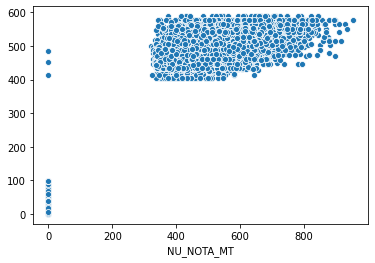

In [65]:
sns.scatterplot(y,y_previsto)

In [66]:
residuo = regressao.resid

Text(0, 0.5, 'Y_previsto')

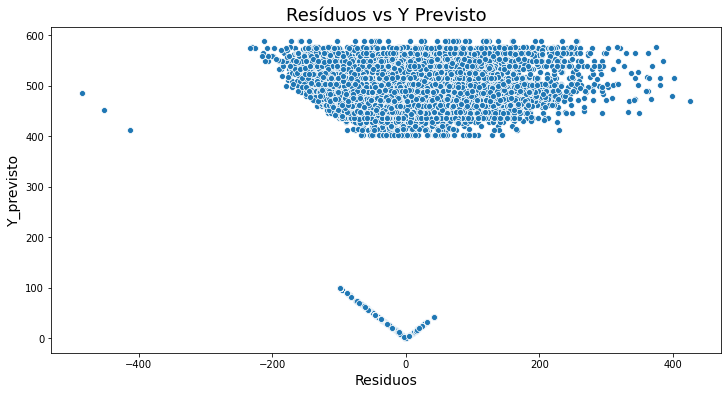

In [67]:
ax = sns.scatterplot(x=residuo, y=y_previsto)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Y Previsto', fontsize=18)
ax.set_xlabel('Residuos', fontsize=14)
ax.set_ylabel('Y_previsto', fontsize=14)

Text(0.5, 0, 'Y_previsto')

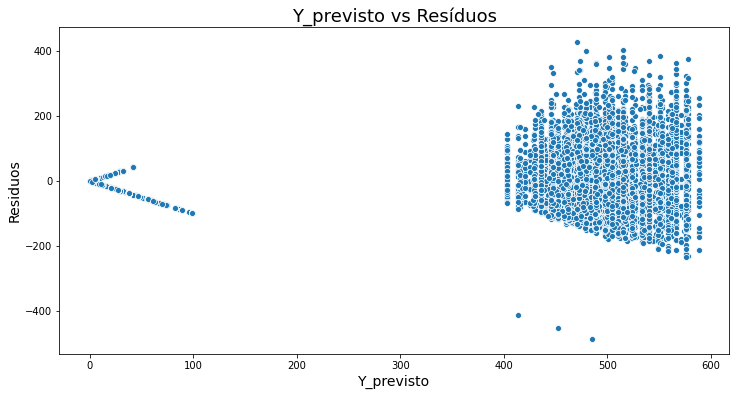

In [68]:
#trocando os eixos
ax = sns.scatterplot(y=residuo, x=y_previsto)
ax.figure.set_size_inches(12,6)
ax.set_title('Y_previsto vs Resíduos', fontsize=18)
ax.set_ylabel('Residuos', fontsize=14)
ax.set_xlabel('Y_previsto', fontsize=14)

In [69]:
from scipy.stats import probplot

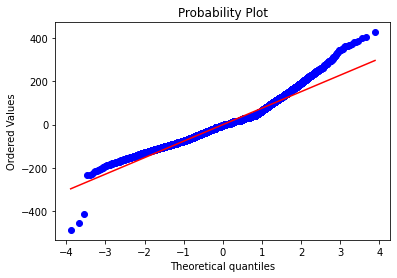

In [70]:
#visualizando a curva dos resíduos
(_,(_,_,_)) = probplot(residuo, plot = plt)

Text(0, 0.5, 'Resíduos²')

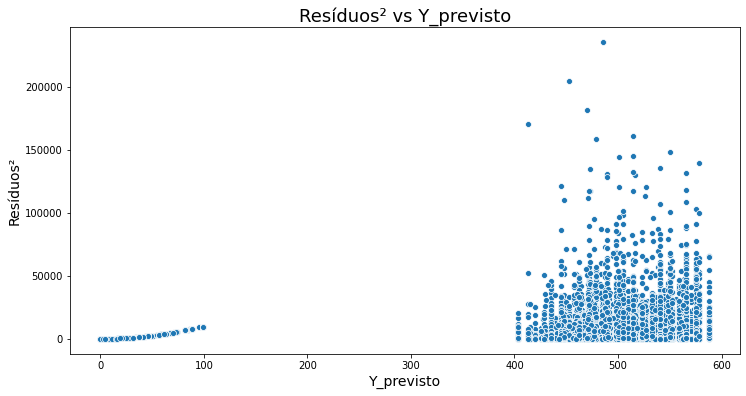

In [71]:
#visualizando gráfico com os resíduos ao quadrado
ax = sns.scatterplot(x=y_previsto, y=residuo**2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos² vs Y_previsto', fontsize=18)
ax.set_xlabel('Y_previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)

In [72]:
#calculando o MSE com o sm
#calculando com o Statsmodels
EQM = regressao.mse_resid
EQM

6022.43

## Após nova definição de colunas - reaplicaremos os testes do SKLearn

In [73]:
X.head()

,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,CO_PROVA_LC,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q024,Q025,Q047
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,-1.27,1.05,-1.05,0.67,0.67,0.67,-0.57,-0.57,-0.47,-0.57,-0.60,-0.83,-0.60,-0.62,-0.62,-0.62,-0.67,1.12,1.15,0.41
2c3acac4b33ec2b195d77e7c04a2d75727fad723,0.79,-0.95,0.95,-1.49,-1.49,-1.49,-0.57,-0.57,-0.47,-0.57,-0.60,-0.83,-0.60,-0.62,-0.62,-0.62,-0.67,1.12,1.15,0.41
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,0.79,-0.95,0.95,0.67,0.67,0.67,1.75,1.75,-0.47,1.75,1.68,-0.83,1.68,1.61,1.60,1.60,1.48,1.12,1.15,0.41
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,0.79,1.05,-1.05,0.67,0.67,0.67,1.75,1.75,-0.47,1.75,1.68,1.21,1.68,1.61,1.60,1.60,1.48,-0.90,-0.87,-2.42
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,-1.27,1.05,-1.05,0.67,0.67,0.67,1.75,1.75,-0.47,1.75,1.68,-0.83,1.68,1.61,1.60,1.60,1.48,1.12,1.15,0.41


In [74]:
#dropar as colunas que falharam na regressão do statsmodels
X = X.drop(colunas_a_excluir, axis=1)

In [76]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, random_state = 1606 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(10297, 10)
(3433, 10)
(10297,)
(3433,)


In [81]:
#reaplicando o modelo
from sklearn.ensemble import GradientBoostingRegressor
modelo21 = GradientBoostingRegressor(alpha=0.05, learning_rate=0.1, n_estimators=150, random_state=0)
modelo21.fit(x_treino, y_treino)
predicoes_modelo = modelo21.predict(x_teste)


In [82]:
avaliacao = mean_squared_error(y_teste, predicoes_modelo)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")
print(modelo21.score(x_teste, y_teste) * 100)
print(predicoes_modelo[:5].round(1))
print(y_teste[:5])

Minha avaliação nos dados de teste foi de 5682.205211791107
88.92284806542548
[439.2 444.1 478.2 579.1   1. ]
NU_INSCRICAO
4d90a1910ffb39e02fbf66176fe103c7cbcfa327   449.20
00e3220ed4a0f76a9076d28531cdfae81a3774b0   457.80
31daf51980849caf320172b2d9e83966d93c92e8   445.50
0352cb6307d663f5fb4f4acccd4ccef576e52c5e   506.80
458c445693310dfd5c0ccec83a70054b6b5521ed     0.00
Name: NU_NOTA_MT, dtype: float64


## APLICANDO AS TRANSFORMAÇÕES NA BASE DE TESTES


In [83]:
#definindo a inscrição como index
teste = teste.set_index('NU_INSCRICAO')

In [87]:
#definindo as colunas que vamos utilizar
colunas = list(X.columns)
colunas

['TP_SEXO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'CO_PROVA_LC',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'NU_NOTA_COMP5',
 'Q024',
 'Q025',
 'Q047']

In [88]:
teste = teste[colunas]


In [89]:
#visualizando a base de testes
teste.head()

,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,CO_PROVA_LC,NU_NOTA_LC,TP_LINGUA,NU_NOTA_COMP5,Q024,Q025,Q047
NU_INSCRICAO,,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,F,1,5,01abbb7f1a90505385f44eec9905f82ca2a42cfd,431.80,0,40.00,A,A,A
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,F,1,8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,548.00,1,100.00,B,B,A
b38a03232f43b11c9d0788abaf060f7366053b6d,M,2,0,01af53cd161a420fff1767129c10de560cc264dd,613.60,0,80.00,B,B,A
70b682d9a3636be23f6120fa9d6b164eb3c6002d,F,1,8,2d22ac1d42e6187f09ee6c578df187a760123ccf,nan,0,nan,B,B,A
715494628a50142ce8cb17191cfe6d0f3cae0934,M,2,0,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,571.40,1,0.00,C,B,A


In [90]:
#usando a estratégia de mudar os nulos nos dados de teste
teste_cat = list(teste.select_dtypes(exclude='number').columns)
teste_num = list(teste.select_dtypes(include='number').columns)

In [91]:
teste[teste_cat] = teste[teste_cat].fillna('0')
teste[teste_num] = teste[teste_num].fillna(0)

In [92]:
#transformando os dados
#substituindo as colunas pelo pre-processamento
for coluna in teste.columns:
  try:
    teste[coluna] = encoder_cat.fit_transform(teste[[coluna]])
    teste[coluna] = scaler.fit_transform(teste[[coluna]])
  except:
    print(f"Nao foi possivel realizar a operacao para a coluna {coluna}")

In [93]:
#aplicando o modelo no teste
Y_PREVISTO = modelo21.predict(teste)

In [94]:
Y_PREVISTO[:5]

array([455.04421312, 467.1799727 , 513.62348112,   0.92460596,
       446.69521128])

In [95]:
coluna_label = 'NU_NOTA_MT'

In [98]:
#criando o DF do desafio e criando a predição
desafio_df = pd.DataFrame(teste.index)
desafio_df[coluna_label] = abs(Y_PREVISTO)



In [99]:
desafio_df

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,455.04
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,467.18
2,b38a03232f43b11c9d0788abaf060f7366053b6d,513.62
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.92
4,715494628a50142ce8cb17191cfe6d0f3cae0934,446.70
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,455.18
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,458.47
4573,655fa6306720ff16e825903b5422a46608a77545,624.32
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,458.47


In [100]:
#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
from google.colab import files
desafio_df.to_csv('answer.csv', index=False) 
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
#lendo o CSV final
dados= pd.read_csv('/content/answer.csv')
dados.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,455.04
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,467.18
2,b38a03232f43b11c9d0788abaf060f7366053b6d,513.62
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.92
4,715494628a50142ce8cb17191cfe6d0f3cae0934,446.70
